In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Time-Series Analysis1.csv')
df

,Year,Quarter,Period,Sales
0,2018,1,1,684.2
1,2018,2,2,584.1
2,2018,3,3,765.4
3,2018,4,4,892.3
4,2019,1,5,885.4
5,2019,2,6,677.0
6,2019,3,7,1006.6
7,2019,4,8,1122.1
8,2020,1,9,1163.4
9,2020,2,10,993.2


In [2]:
df = df[['Sales']]
alpha = 0.2429
beta = 1.0000
gamma = 0.7797
s = 4

In [3]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df1['Y_true'] =df1['Sales']
df1['Level'] = 0.00
df1['Level'][s-1] = np.mean([df1['Y_true'][0:s]])
df1['Trend'] = 0.00
df1['Seasonality'] = 0.00
for i in range(0,s):
    df1['Seasonality'][i] = df1['Y_true'][i] / df1['Level'][s-1]  
for i in range(s,len(df1.Y_true)):
    df1['Level'][i] = alpha * ( df1['Y_true'][i] / df1['Seasonality'][i-s] ) + (1-alpha) * ( df1['Level'][i-1] + df1['Trend'][i-1] )
    
    df1['Trend'][i] = beta * ( df1['Level'][i] - df1['Level'][i-1] ) + (1-beta) * ( df1['Trend'][i-1] )
    
    df1['Seasonality'][i] = gamma * ( df1['Y_true'][i] / df1['Level'][i] ) + (1-gamma) * df1['Seasonality'][i-s]
df1['Y_pred'] = 0.00
for i in range(s,len(df1.Y_true)):
    df1['Y_pred'][i] =  ( df1['Level'][i-1] + df1['Trend'][i-1] ) * df1['Seasonality'][i-s]
df1.drop(labels=[23,22,21], inplace=True)   
df2['Sales'].iloc[-4] = df1['Y_pred'].iloc[-1]
df2.drop(labels=[23,22], inplace=True)
df2['Y_true'] =df2['Sales']
df2['Level'] = 0.00
df2['Level'][s-1] = np.mean([df2['Y_true'][0:s]])
df2['Trend'] = 0.00
df2['Seasonality'] = 0.00
for i in range(0,s):
    df2['Seasonality'][i] = df2['Y_true'][i] / df2['Level'][s-1]  
for i in range(s,len(df2.Sales)):
    df2['Level'][i] = alpha * ( df2['Y_true'][i] / df2['Seasonality'][i-s] ) + (1-alpha) * ( df2['Level'][i-1] + df2['Trend'][i-1] )
    
    df2['Trend'][i] = beta * ( df2['Level'][i] - df2['Level'][i-1] ) + (1-beta) * ( df2['Trend'][i-1] )
    
    df2['Seasonality'][i] = gamma * ( df2['Y_true'][i] / df2['Level'][i] ) + (1-gamma) * df2['Seasonality'][i-s]
df2['Y_pred'] = 0.00
for i in range(s,len(df2.Sales)):
    df2['Y_pred'][i] =  ( df2['Level'][i-1] + df2['Trend'][i-1] ) * df2['Seasonality'][i-s]
df3.drop(labels=[23], inplace=True)
df3['Sales'].iloc[-3] = df2['Y_pred'].iloc[-2]
df3['Sales'].iloc[-2] = df2['Y_pred'].iloc[-1]
df3['Y_true'] =df3['Sales']
df3['Level'] = 0.00
df3['Level'][s-1] = np.mean([df3['Y_true'][0:s]])
df3['Trend'] = 0.00
df3['Seasonality'] = 0.00
for i in range(0,s):
    df3['Seasonality'][i] = df3['Y_true'][i] / df3['Level'][s-1]  
for i in range(s,len(df3.Sales)):
    df3['Level'][i] = alpha * ( df3['Y_true'][i] / df3['Seasonality'][i-s] ) + (1-alpha) * ( df3['Level'][i-1] + df3['Trend'][i-1] )
    
    df3['Trend'][i] = beta * ( df3['Level'][i] - df3['Level'][i-1] ) + (1-beta) * ( df3['Trend'][i-1] )
    
    df3['Seasonality'][i] = gamma * ( df3['Y_true'][i] / df3['Level'][i] ) + (1-gamma) * df3['Seasonality'][i-s]
df3['Y_pred'] = 0.00
for i in range(s,len(df3.Sales)):
    df3['Y_pred'][i] =  ( df3['Level'][i-1] + df3['Trend'][i-1] ) * df3['Seasonality'][i-s]
df4['Sales'].iloc[-4] = df3['Y_pred'].iloc[-3]
df4['Sales'].iloc[-3] = df3['Y_pred'].iloc[-2]
df4['Sales'].iloc[-2] = df3['Y_pred'].iloc[-1]
df4['Y_true'] =df4['Sales']
df4['Level'] = 0.00
df4['Level'][s-1] = np.mean([df4['Y_true'][0:s]])
df4['Trend'] = 0.00
df4['Seasonality'] = 0.00
for i in range(0,s):
    df4['Seasonality'][i] = df4['Y_true'][i] / df4['Level'][s-1]  
for i in range(s,len(df4.Sales)):
    df4['Level'][i] = alpha * ( df4['Y_true'][i] / df4['Seasonality'][i-s] ) + (1-alpha) * ( df4['Level'][i-1] + df4['Trend'][i-1] )
    
    df4['Trend'][i] = beta * ( df4['Level'][i] - df4['Level'][i-1] ) + (1-beta) * ( df4['Trend'][i-1] )
    
    df4['Seasonality'][i] = gamma * ( df4['Y_true'][i] / df4['Level'][i] ) + (1-gamma) * df4['Seasonality'][i-s]
df4['Y_pred'] = 0.00
for i in range(s,len(df4.Sales)):
    df4['Y_pred'][i] =  ( df4['Level'][i-1] + df4['Trend'][i-1] ) * df4['Seasonality'][i-s]
df4['Sales'].iloc[-1] = df4['Y_pred'].iloc[-1]
df4['Sales'].iloc[-1]
df5['Forecast Fit'] = df4['Y_pred']
df5['Actual'] = df['Sales']
for j in range(0,4):
    df5['Forecast Fit'][j] = "" 
for j in range(20,len(df5['Actual'])):
    df5['Actual'][j] = "" 
df5 = df5[['Actual','Forecast Fit']]
df5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Actual,Forecast Fit
0,684.2,
1,584.1,
2,765.4,
3,892.3,
4,885.4,684.2
5,677.0,667.542945
6,1006.6,935.43471
7,1122.1,1198.074703
8,1163.4,1112.488255
9,993.2,887.949685


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


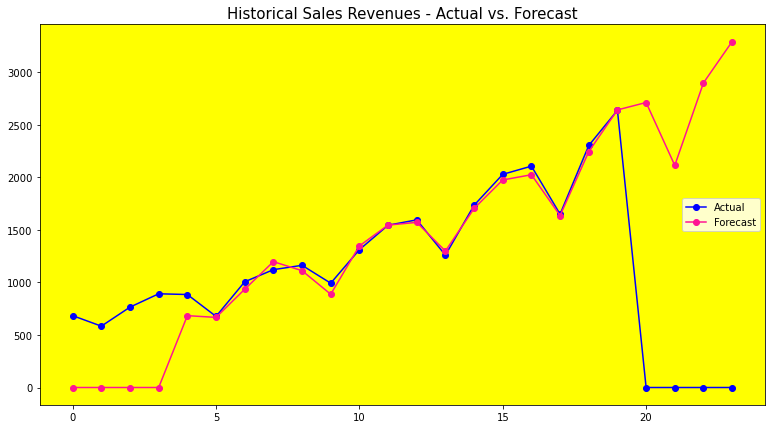

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(13,7))
fontsize=15
plt.title("Historical Sales Revenues - Actual vs. Forecast",fontsize=fontsize)
ax = plt.axes()
ax.set_facecolor("yellow")
df5['Forecast Fit'] = df4['Y_pred']
df5['Actual'] = df['Sales']
Actual = np.array(df5['Actual'])
Forecast = np.array(df5['Forecast Fit'])
plt.plot(Actual, marker = 'o', color="blue", label="Actual")
plt.plot(Forecast,marker = 'o', color="deeppink", label="Forecast")
plt.legend(loc="center right")
plt.show()

In [5]:
df = pd.read_csv('Time-Series Analysis1.csv')
df = df[['Sales']]
m = np.array(df['Sales'])
index = [-4, -3, -2, -1]
m = np.delete(m, index)
df = pd.DataFrame(data=m, columns = ['Sales'])
df.rename(columns={"Sales": "Y_true"},inplace=True)
df = df.dropna()
df['Level'] = 0.00
df['Level'][s-1] = np.mean([df['Y_true'][0:s]])
df['Trend'] = 0.00
df['Seasonality'] = 0.00
df['Y_pred'] = 0.00
df['Absolute Error'] = 0.00
df['Squared Error'] = 0.00
df['Precent Error1'] = 0.00
df['Precent Error2'] = 0.00
df['Precent Error3'] = 0.00
df['Error'] = 0.00
df['Squared Error Diff'] = 0.00
for i in range(0,s):
    df['Seasonality'][i] = df['Y_true'][i] / df['Level'][s-1]  
for i in range(s,len(df.Y_true)):
    df['Level'][i] = alpha * ( df['Y_true'][i] / df['Seasonality'][i-s] ) + (1-alpha) * ( df['Level'][i-1] + df['Trend'][i-1] )
    df['Trend'][i] = beta * ( df['Level'][i] - df['Level'][i-1] ) + (1-beta) * ( df['Trend'][i-1] )
    df['Seasonality'][i] = gamma * ( df['Y_true'][i] / df['Level'][i] ) + (1-gamma) * df['Seasonality'][i-s]
    df['Y_pred'][i] =  ( df['Level'][i-1] + df['Trend'][i-1] ) * df['Seasonality'][i-s]
    df['Absolute Error'][i] = abs( df['Y_pred'][i] - df['Y_true'][i] )
    df['Squared Error'][i] = ( df['Y_pred'][i] - df['Y_true'][i] )**2
    df['Precent Error1'][i] = abs ((  df['Y_true'][i] - df['Y_pred'][i] ) / df['Y_true'][i])
    df['Precent Error2'][i] = ( (  df['Y_pred'][i] - df['Y_true'][i] ) / df['Y_true'][i-1] )**2
    df['Precent Error3'][i] = ( (  df['Y_true'][i] - df['Y_true'][i-1] ) / df['Y_true'][i-1] )**2
    df['Error'][i] = ( df['Y_pred'][i] - df['Y_true'][i] )
    df['Squared Error Diff'][i] = ( df['Error'][i] - df['Error'][i-1] )**2
MSE = np.mean(df['Squared Error'][s:])
RMSE = np.sqrt(MSE)
MAE = np.mean(df['Absolute Error'][s:])
ThielsU = np.sqrt( np.sum( df['Precent Error2'][s:-1] ) / np.sum( df['Precent Error3'][s:] ) )
MAPE = np.mean(df['Precent Error1'][s:])
print("\033[1m Error Measurements")
print("\033[1m ==================")
print("\033[1m RMSE:","{:.4f}".format(RMSE))
print("\033[1m MSE:","{:.4f}".format(MSE))
print("\033[1m MAD:","{:.4f}".format(MAE))
print("\033[1m MAPE:","{:.2%}".format(MAPE))
print("\033[1m ThielsU:","{:.4f}".format(ThielsU))

 Error Measurements
 RMSE: 71.8132
 MSE: 5157.1344
 MAD: 53.4067
 MAPE: 4.50%
 ThielsU: 0.3054
